In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/Estadistica2025BB/Estadistica2025B/refs/heads/main/Furniture.csv"
df = pd.read_csv(url)
df = df.dropna()
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


In [ ]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

In [ ]:
df.columns = ['precio', 'costo', 'ventas',
       'margen_beneficio', 'inventario', 'porcentaje_descuento',
       'días_entrega', 'categoria', 'material', 'color',
       'ubicación', 'estación', 'tipo_tienda', 'marca', 'ganancia']
df

,precio,costo,ventas,margen_beneficio,inventario,porcentaje_descuento,días_entrega,categoria,material,color,ubicación,estación,tipo_tienda,marca,ganancia
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


Index(['categoria', 'material', 'color', 'ubicación', 'estación',
       'tipo_tienda', 'marca'],
      dtype='object')


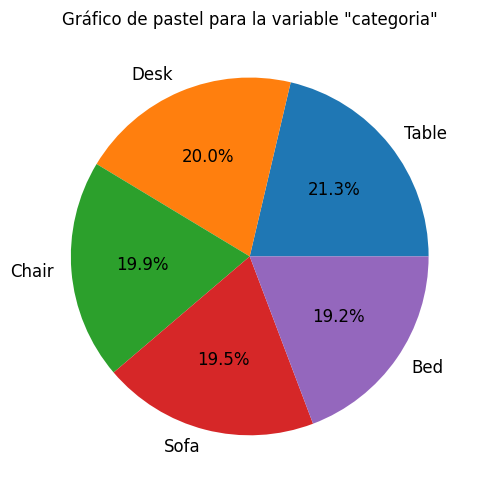

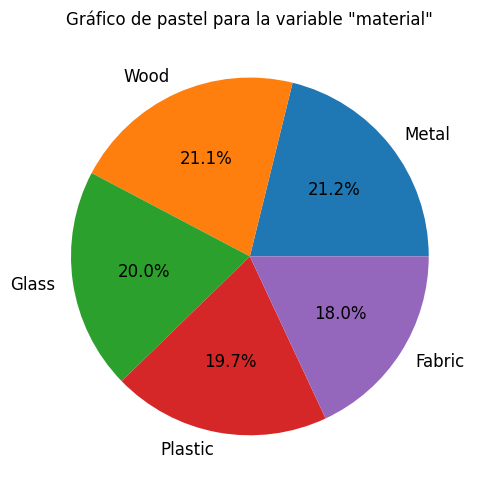

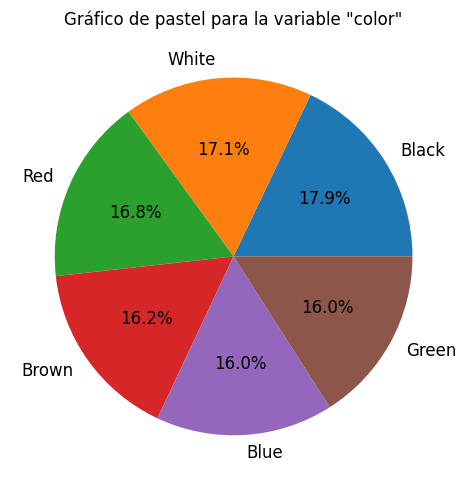

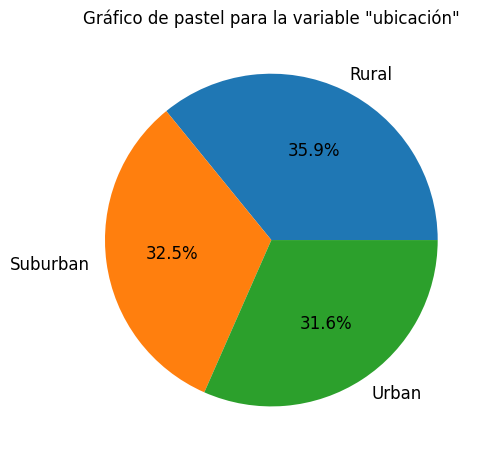

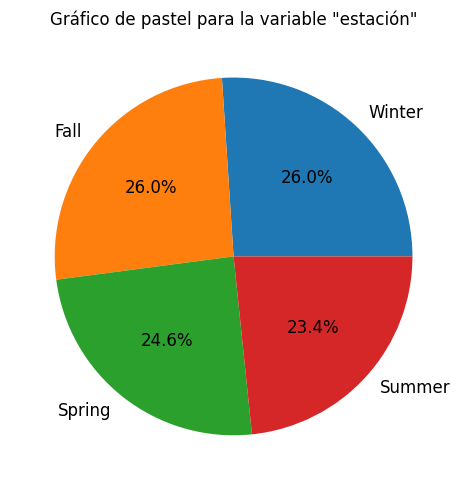

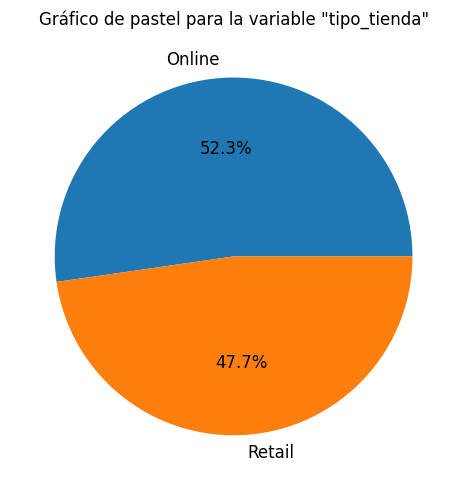

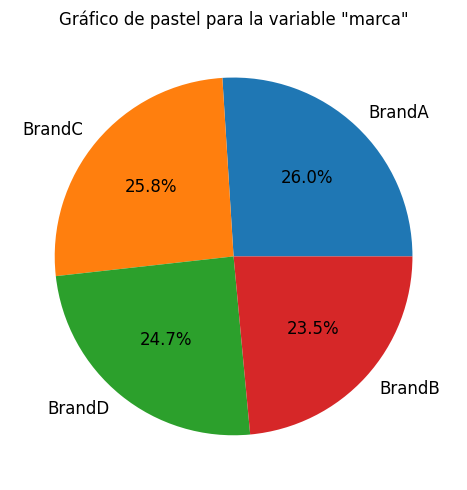

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

for col in categorical_cols:
    fig, ax = plt.subplots(figsize=(5, 5))

    df[col].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%',
        ax=ax,
        shadow=False,
        textprops={'fontsize': 12}
    )
    ax.set_title(f'Gráfico de pastel para la variable "{col}"', fontsize=12)
    ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Y ~ X
modelo_lineal = ols(' precio ~ costo + ventas + margen_beneficio + inventario + porcentaje_descuento + días_entrega + ganancia +  C(categoria) + C(material) + C(color) + C(ubicación) + C(estación) + C(tipo_tienda) + C(marca) + (ganancia)',
                    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(categoria),4.0,9.657745e+04,2.414436e+04,51.554198,9.439574e-42
C(material),4.0,8.895205e+04,2.223801e+04,47.483664,1.642059e-38
C(color),5.0,3.360018e+04,6.720036e+03,14.348941,7.101209e-14
C(ubicación),2.0,6.284114e+04,3.142057e+04,67.090703,4.234123e-29
C(estación),3.0,3.940800e+04,1.313600e+04,28.048617,7.846721e-18
C(tipo_tienda),1.0,6.042131e+02,6.042131e+02,1.290145,2.561315e-01
C(marca),3.0,3.198871e+04,1.066290e+04,22.767941,1.545171e-14
costo,1.0,3.693319e+07,3.693319e+07,78861.501579,0.000000e+00
ventas,1.0,2.565956e+03,2.565956e+03,5.478952,1.932597e-02
margen_beneficio,1.0,4.363054e+06,4.363054e+06,9316.200385,0.000000e+00


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Online Retail  -0.5195 0.9211 -10.7994 9.7605  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

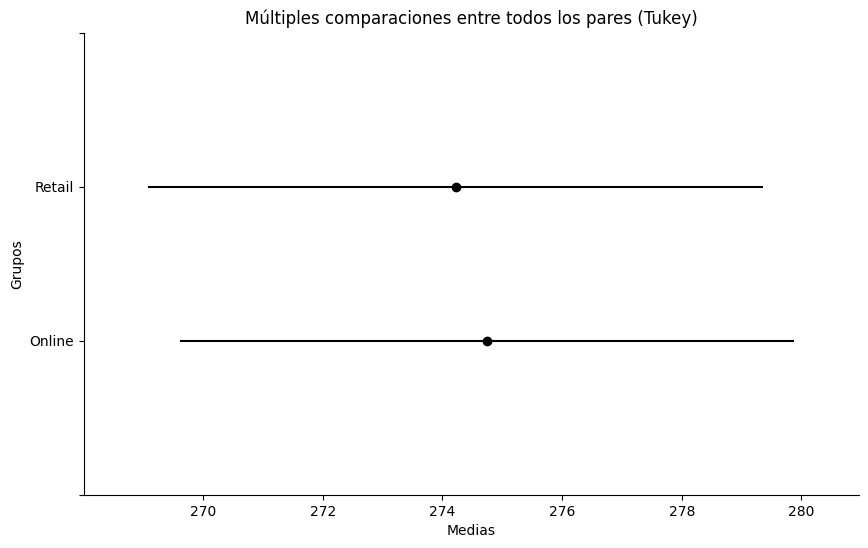

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['precio'], groups=df['tipo_tienda'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Bed  Chair  12.1689 0.5927 -10.6785 35.0163  False
   Bed   Desk  18.7634 0.1632  -4.0391 41.5659  False
   Bed   Sofa  13.6787 0.4802  -9.2721 36.6295  False
   Bed  Table   14.382 0.4049  -8.0828 36.8467  False
 Chair   Desk   6.5945 0.9318 -16.0199  29.209  False
 Chair   Sofa   1.5098 0.9998 -21.2542 24.2738  False
 Chair  Table   2.2131 0.9988 -20.0608 24.4869  False
  Desk   Sofa  -5.0847 0.9734 -27.8036 17.6342  False
  Desk  Table  -4.3815 0.9834 -26.6093 17.8463  False
  Sofa  Table   0.7032    1.0 -21.6766 23.0831  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

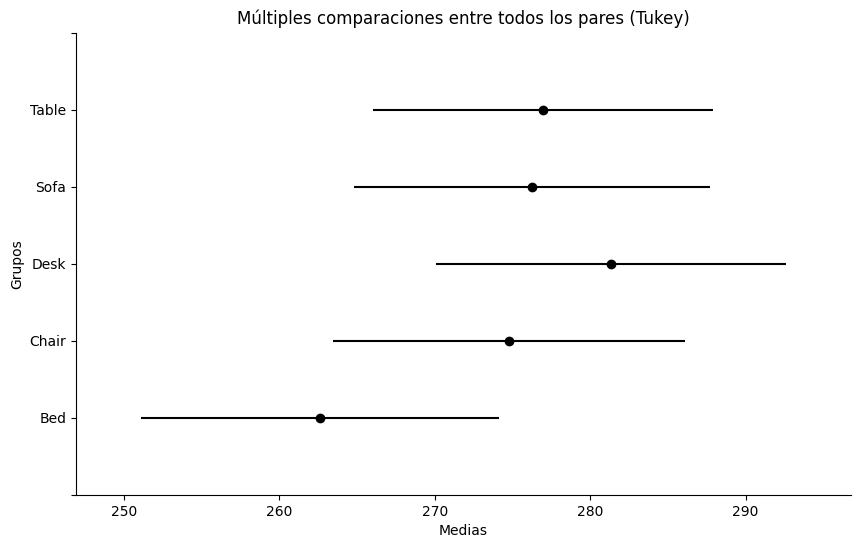

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['precio'], groups=df['categoria'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
 Fabric   Glass -16.3299  0.306 -39.5288  6.8691  False
 Fabric   Metal -14.3415 0.4279  -37.237  8.5539  False
 Fabric Plastic -15.6566 0.3534 -38.9449  7.6316  False
 Fabric    Wood  -8.0018 0.8757 -30.9072 14.9035  False
  Glass   Metal   1.9883 0.9992 -20.2933 24.2699  False
  Glass Plastic   0.6733    1.0 -22.0118 23.3583  False
  Glass    Wood   8.3281 0.8463 -13.9638 30.6199  False
  Metal Plastic  -1.3151 0.9999 -23.6896 21.0594  False
  Metal    Wood   6.3397 0.9343  -15.636 28.3155  False
Plastic    Wood   7.6548 0.8839 -14.7299 30.0395  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

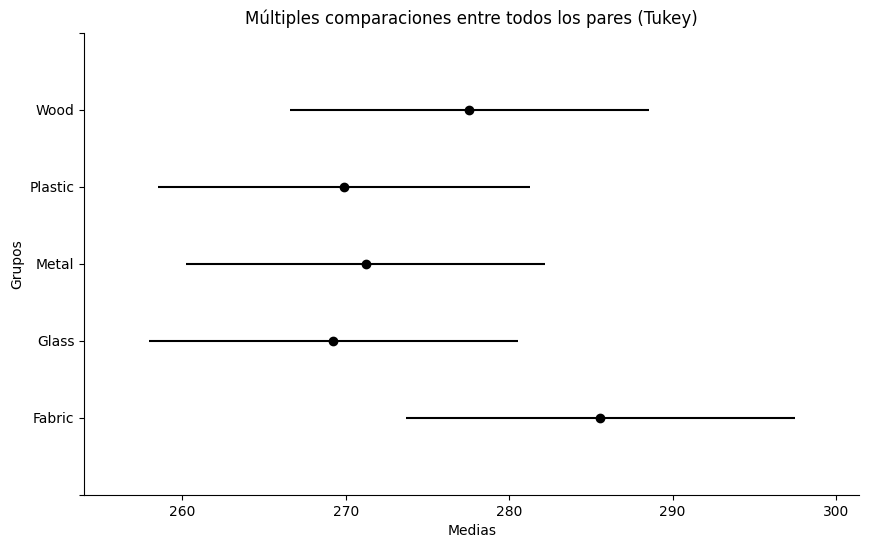

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['precio'], groups=df['material'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Black   Blue  -6.6588  0.977 -32.3394 19.0218  False
 Black  Brown  -6.3939 0.9805 -31.9909 19.2031  False
 Black  Green  -6.9891 0.9717 -32.7037 18.7254  False
 Black    Red  -0.2042    1.0 -25.5921 25.1836  False
 Black  White   0.4321    1.0 -24.8326 25.6967  False
  Blue  Brown   0.2649    1.0 -26.0356 26.5654  False
  Blue  Green  -0.3304    1.0 -26.7452 26.0845  False
  Blue    Red   6.4546 0.9813 -19.6424 32.5516  False
  Blue  White   7.0908 0.9712 -18.8863  33.068  False
 Brown  Green  -0.5952    1.0 -26.9289 25.7384  False
 Brown    Red   6.1897 0.9843  -19.825 32.2045  False
 Brown  White    6.826 0.9753 -19.0685 32.7205  False
 Green    Red   6.7849 0.9769 -19.3454 32.9153  False
 Green  White   7.4212 0.9651 -18.5895 33.4319  False
   Red  White   0.6363    1.0 -25.0515 26.3241  False
----------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

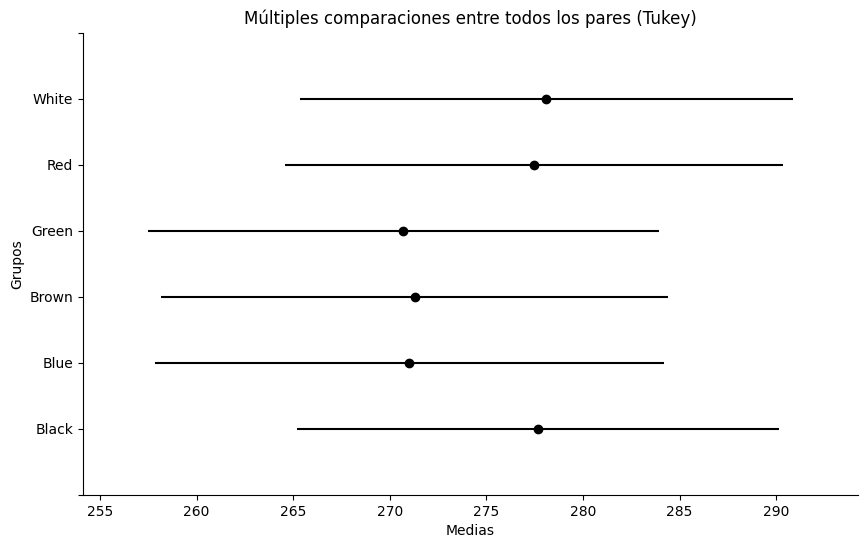

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['precio'], groups=df['color'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   Rural Suburban   3.8272 0.8179 -11.0323 18.6867  False
   Rural    Urban  -8.4754   0.38  -23.448  6.4971  False
Suburban    Urban -12.3026 0.1441 -27.6331  3.0279  False
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

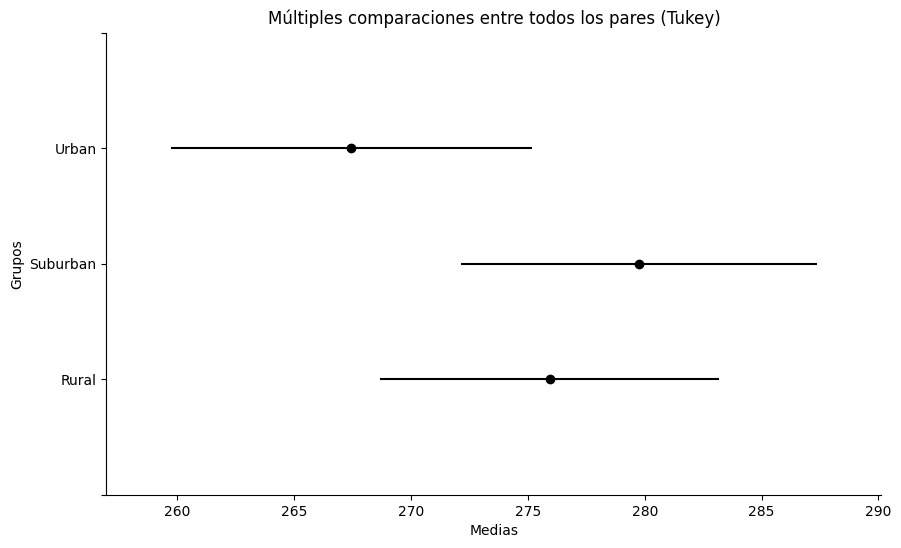

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['precio'], groups=df['ubicación'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Fall Spring  -1.5262 0.9969 -20.4601 17.4077  False
  Fall Summer  -5.1699 0.8999 -24.3524 14.0126  False
  Fall Winter  -9.8403 0.5272 -28.4952  8.8146  False
Spring Summer  -3.6437 0.9632 -23.0976 15.8102  False
Spring Winter  -8.3141 0.6717  -27.248 10.6198  False
Summer Winter  -4.6704 0.9238 -23.8529 14.5121  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

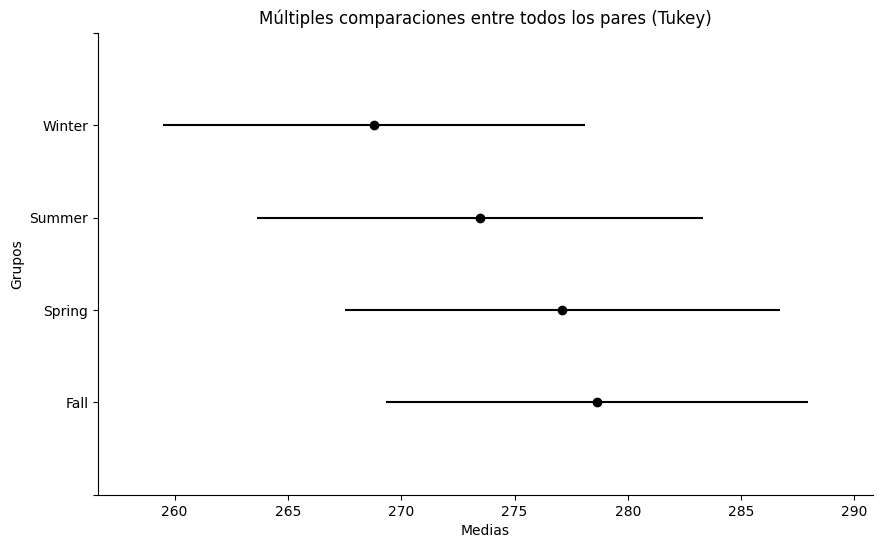

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['precio'], groups=df['estación'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
BrandA BrandB   0.0433    1.0 -19.1132 19.1998  False
BrandA BrandC   7.7988 0.7071 -10.9153 26.5129  False
BrandA BrandD   6.0373 0.8447 -12.8735  24.948  False
BrandB BrandC   7.7555 0.7268 -11.4433 26.9543  False
BrandB BrandD   5.9939 0.8569 -13.3967 25.3846  False
BrandC BrandD  -1.7615 0.9952 -20.7152 17.1921  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los\xa0pares\xa0(Tukey)')

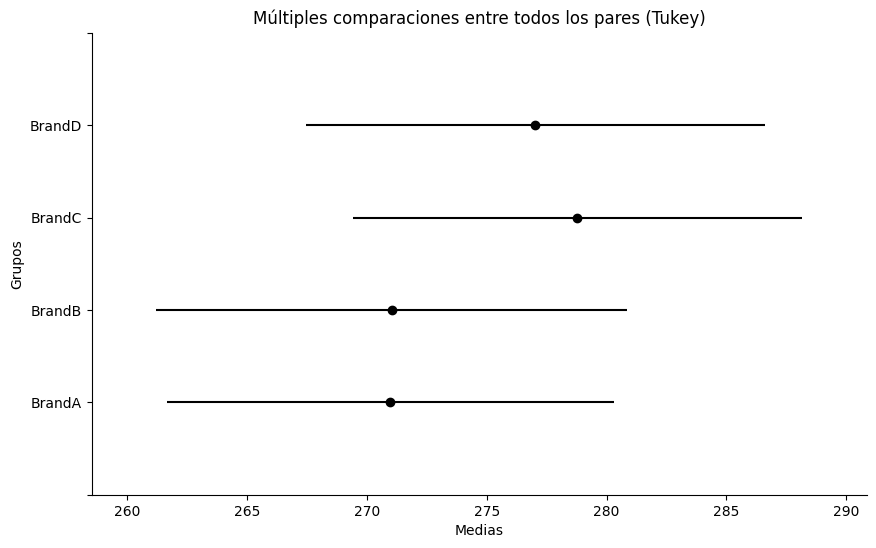

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['precio'], groups=df['marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["categoria"]= df["categoria"].map({"Bed":0, "Chair":1, "Desk": 2, "Sofa": 3, "Table": 4})

df["material"]= df["material"].map({"Glass":0, "Plastic":1, "Metal": 2, "Wood": 3, "Fabric": 4})

df["color"]= df["color"].map({"Green": 0, "Blue": 2, "Brown": 3, "Red":4,  "Black": 5 ,"White": 6})

df["ubicación"]= df["ubicación"].map({"Urban": 0, "Rural":1, "Suburban":2})

df["estación"]= df["estación"].map({"Winter": 0, "Summer":1, "Spring":2, "Fall": 3})

df["marca"]= df["marca"].map({"BrandA":0, "BrandB":1, "BrandD": 2, "BrandC": 3})
df

,precio,costo,ventas,margen_beneficio,inventario,porcentaje_descuento,días_entrega,categoria,material,color,ubicación,estación,tipo_tienda,marca,ganancia
0,218.543053,181.610932,40,16.899243,105,27.796433,9,0,1,4,1,2,Online,0,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,1,0,2,1,1,Online,2,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,4,2,5,2,3,Online,2,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,4,0,0,1,1,Retail,2,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,1,0,3,1,3,Online,2,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,1,2,6,2,3,Retail,1,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,0,0,4,0,1,Retail,2,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,2,4,4,1,1,Online,2,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,2,2,5,2,3,Retail,0,18963.246944


In [ ]:
df = df.drop(columns=["tipo_tienda"])
df

,precio,costo,ventas,margen_beneficio,inventario,porcentaje_descuento,días_entrega,categoria,material,color,ubicación,estación,marca,ganancia
0,218.543053,181.610932,40,16.899243,105,27.796433,9,0,1,4,1,2,0,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,1,0,2,1,1,2,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,4,2,5,2,3,2,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,4,0,0,1,1,2,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,1,0,3,1,3,2,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,1,2,6,2,3,1,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,0,0,4,0,1,2,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,2,4,4,1,1,2,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,2,2,5,2,3,0,18963.246944


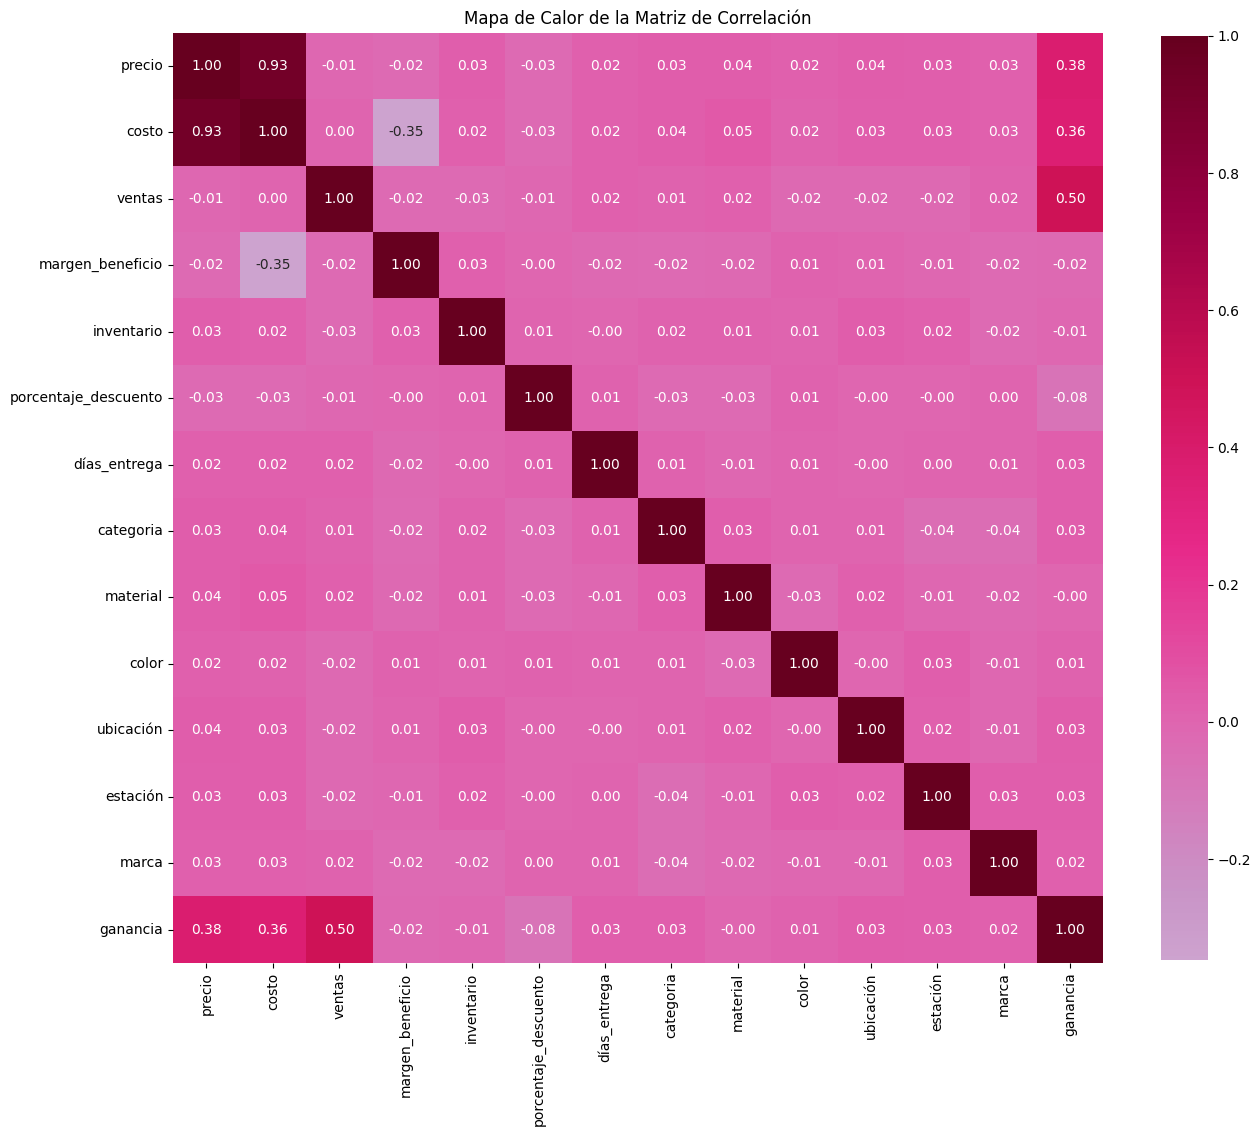

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt=".2f", square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Coeficiente de determinación:  0.9727

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
C(categoria),4.0,9.657745e+04,2.414436e+04,51.558297,9.354731e-42
C(material),4.0,8.895205e+04,2.223801e+04,47.487440,1.628569e-38
C(color),5.0,3.360018e+04,6.720036e+03,14.350082,7.081030e-14
C(ubicación),2.0,6.284114e+04,3.142057e+04,67.096038,4.209858e-29
C(estación),3.0,3.940800e+04,1.313600e+04,28.050847,7.819551e-18
C(marca),3.0,3.188341e+04,1.062780e+04,22.694799,1.716355e-14
costo,1.0,3.693267e+07,3.693267e+07,78866.668542,0.000000e+00
ventas,1.0,2.558044e+03,2.558044e+03,5.462491,1.950840e-02
margen_beneficio,1.0,4.363972e+06,4.363972e+06,9318.902988,0.000000e+00
inventario,1.0,1.328095e+02,1.328095e+02,0.283604,5.943968e-01


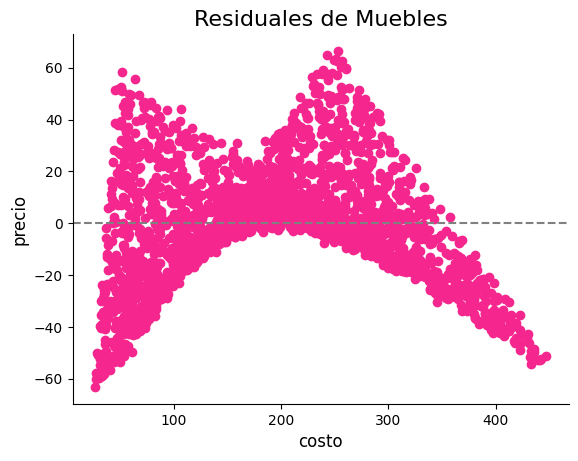

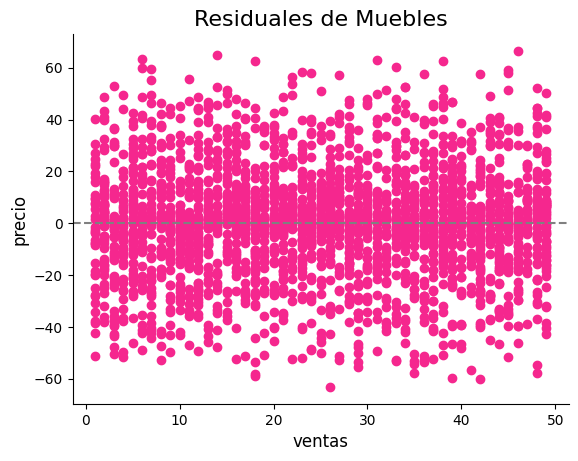

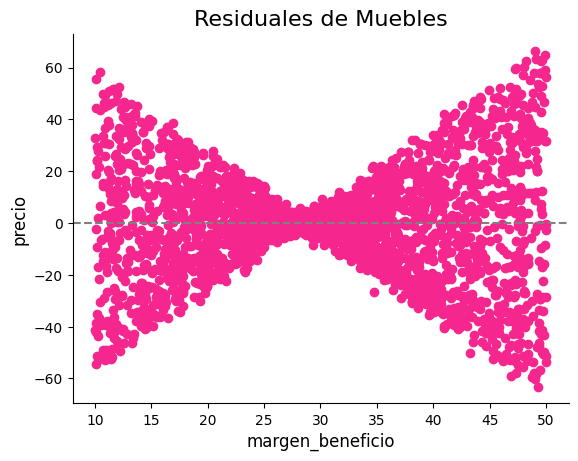

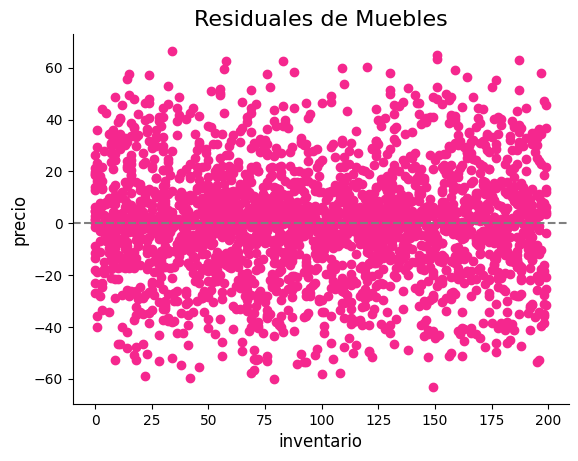

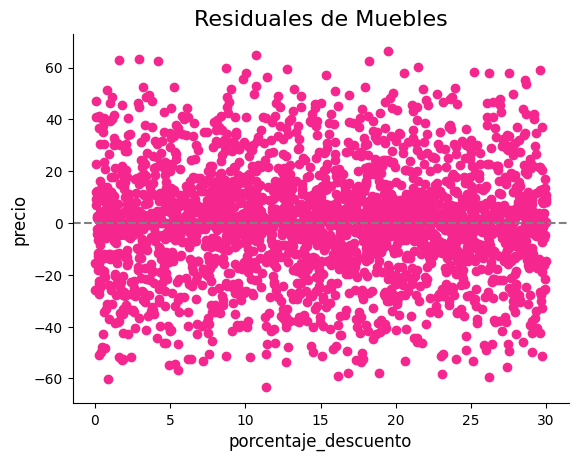

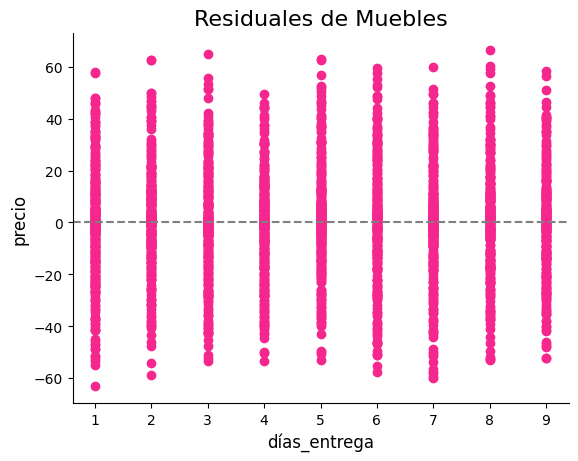

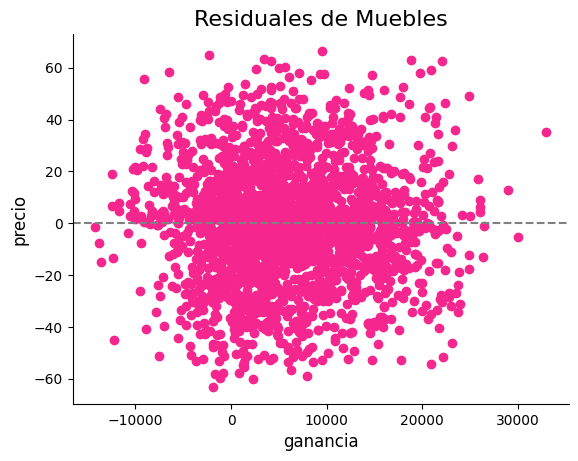

In [ ]:
x = df[[ 'costo', 'ventas',
       'margen_beneficio', 'inventario', 'porcentaje_descuento',
       'días_entrega', 'categoria', 'material', 'color',
       'ubicación', 'estación', 'marca', 'ganancia']]
y = df["precio"]

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# plt.plot(x, yc, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?

residuales = modelo.resid
plt.figure()
plt.scatter(x["costo"], residuales, color = '#F5278E')
plt.xlabel('costo', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de Muebles", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["ventas"], residuales, color = '#F5278E')
plt.xlabel('ventas', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de Muebles", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["margen_beneficio"], residuales, color = '#F5278E')
plt.xlabel('margen_beneficio', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de Muebles", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["inventario"], residuales, color = '#F5278E')
plt.xlabel('inventario', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de Muebles", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["porcentaje_descuento"], residuales, color = '#F5278E')
plt.xlabel('porcentaje_descuento', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de Muebles", fontsize = 16)


residuales = modelo.resid
plt.figure()
plt.scatter(x["días_entrega"], residuales, color = '#F5278E')
plt.xlabel('días_entrega', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de Muebles", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["ganancia"], residuales, color = '#F5278E')
plt.xlabel('ganancia', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales de Muebles", fontsize = 16)





# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('precio ~ costo + ventas + margen_beneficio + inventario + porcentaje_descuento + días_entrega + C(categoria) + C(material) + C(color) + C(ubicación) + C(estación) + C(marca) + (ganancia)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

In [ ]:
modelo.params

,0
const,-109.639746
costo,1.386075
ventas,-0.081797
margen_beneficio,3.843007
inventario,0.003767
porcentaje_descuento,0.050968
días_entrega,-0.189479
categoria,0.044748
material,-0.155312
color,0.110806


 **MODELO DEL CLIENTE**

Coeficiente de determinación:  0.0070

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.2185



,df,sum_sq,mean_sq,F,PR(>F)
C(categoria),4.0,9.657745e+04,24144.363238,1.408931,0.228402
C(material),4.0,8.895205e+04,22238.011569,1.297687,0.268603
C(color),5.0,3.360018e+04,6720.035702,0.392144,0.854497
C(ubicación),2.0,6.284114e+04,31420.570820,1.833531,0.160065
C(estación),3.0,3.940800e+04,13136.000972,0.766544,0.512707
C(marca),3.0,3.188341e+04,10627.803716,0.620180,0.601920
porcentaje_descuento,1.0,2.458449e+04,24584.491650,1.434615,0.231127
días_entrega,1.0,1.068501e+04,10685.008821,0.623518,0.429819
Residual,2476.0,4.243035e+07,17136.650185,NaN,NaN


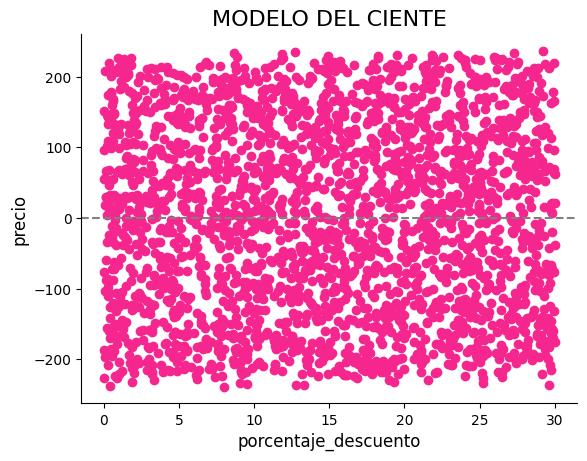

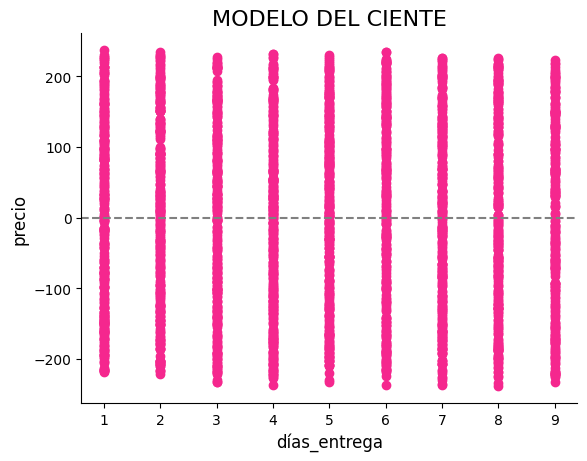

In [ ]:
x = df[[ 'porcentaje_descuento',
       'días_entrega', 'categoria', 'material', 'color',
       'ubicación', 'estación', 'marca']]
y = df["precio"]

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# plt.plot(x, yc, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?

residuales = modelo.resid
plt.figure()
plt.scatter(x["porcentaje_descuento"], residuales, color = '#F5278E')
plt.xlabel('porcentaje_descuento', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("MODELO DEL CIENTE", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["días_entrega"], residuales, color = '#F5278E')
plt.xlabel('días_entrega', fontsize = 12)
plt.ylabel('precio', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("MODELO DEL CIENTE", fontsize = 16)


# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('precio ~  porcentaje_descuento + días_entrega + C(categoria) + C(material) + C(color) + C(ubicación) + C(estación) + C(marca)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

In [ ]:
modelo.params

,0
const,241.423793
porcentaje_descuento,-0.369175
días_entrega,0.829503
categoria,2.918533
material,3.889734
color,1.566043
ubicación,5.918073
estación,3.266142
marca,3.118034
